# Clustering - Student Performance Dataset
Neil John Catapang

In [1]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd

from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import silhouette_score, silhouette_samples  
from sklearn.cluster import KMeans

## Loading the dataset + Mini-EDA

### Loading the Math + Portuguese Dataset

In [2]:
math_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=";")
df = pd.concat([math_df, por_df], axis=0)  # Will be used for EDA after clustering

pd.options.display.max_columns = None

display(math_df)
math_df.info()

display(por_df)
por_df.info()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         3       yes     no  yes   
3      home   mother           1          3         0        no    yes  yes   
4      home   father           1          2         0        no    yes  yes   
..      ...      ...         ...        ...       ...       ...    ...  ...   
390  course    other           1          2         2        no    yes  yes   
391  course   mother           2          1         0        no     no   no   
392  course    other           1          1         3        no     no   no   
393  course   mother           3          1         0        no     no   no   
394  course   father           1          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
390         no     yes    yes       no       no       5         5      4   
391         no      no    yes      yes       no       2         4      5   
392         no      no    yes       no       no       5         5      3   
393         no      no    yes      yes       no       4         4      1   
394         no     yes    yes      yes       no       3         2      3   

     Dalc  Walc  health  absences  G1  G2  G3  
0       1     1       3         6   5   6   6  
1       1     1       3         4   5   5   6  
2       2     3       3        10   7   8  10  
3       1     1       5         2  15  14  15  
4       1     2       5         4   6  10  10  
..    ...   ...     ...       ...  ..  ..  ..  
390     4     5       4        11   9   9   9  
391     3     4       2         3  14  16  16  
392     3     3       3         3  10   8   7  
393     3     4       5         0  11  12  10  
394     3     3       5         5   8   9   9  

[395 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0    course   mother           2          2         0       yes     no   no   
1    course   father           1          2         0        no    yes   no   
2     other   mother           1          2         0       yes     no   no   
3      home   mother           1          3         0        no    yes   no   
4      home   father           1          2         0        no    yes   no   
..      ...      ...         ...        ...       ...       ...    ...  ...   
644  course   mother           1          3         1        no     no   no   
645  course   mother           1          2         0        no    yes   no   
646  course   mother           2          2         0        no     no   no   
647  course   mother           2          1         0        no     no   no   
648  course   mother           3          1         0        no     no   no   

    activities nursery higher internet romantic  famrel  freetime  goout  \
0           no     yes    yes       no       no       4         3      4   
1           no      no    yes      yes       no       5         3      3   
2           no     yes    yes      yes       no       4         3      2   
3          yes     yes    yes      yes      yes       3         2      2   
4           no     yes    yes       no       no       4         3      2   
..         ...     ...    ...      ...      ...     ...       ...    ...   
644        yes      no    yes      yes       no       5         4      2   
645         no     yes    yes      yes       no       4         3      4   
646        yes     yes    yes       no       no       1         1      1   
647         no      no    yes      yes       no       2         4      5   
648         no      no    yes      yes       no       4         4      1   

     Dalc  Walc  health  absences  G1  G2  G3  
0       1     1       3         4   0  11  11  
1       1     1       3         2   9  11  11  
2       2     3       3         6  12  13  12  
3       1     1       5         0  14  14  14  
4       1     2       5         0  11  13  13  
..    ...   ...     ...       ...  ..  ..  ..  
644     1     2       5         4  10  11  10  
645     1     1       1         4  15  15  16  
646     1     1       5         6  11  12   9  
647     3     4       2         6  10  10  10  
648     3     4       5         4  10  11  11  

[649 rows x 33 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

The two dataframes have the same set of features, but the labels (G1, G2, G3), which are their grades for the respective subject at three periods are treated as different labels (one is math grades, the other is grades in Portuguese class). Also, it is possible that there are identical respondents present in both dataset. Thus, clustering will be done using separate datasets.

No missing values were found in both datasets.

### Unique Values

In [3]:
# Show number of unique values per column
print(math_df.nunique())
print(por_df.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64
school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
g

All columns have at least 2 unique values, indicating that all features may be meaningful for prediction and/or clustering.

### Correlation Heatmap

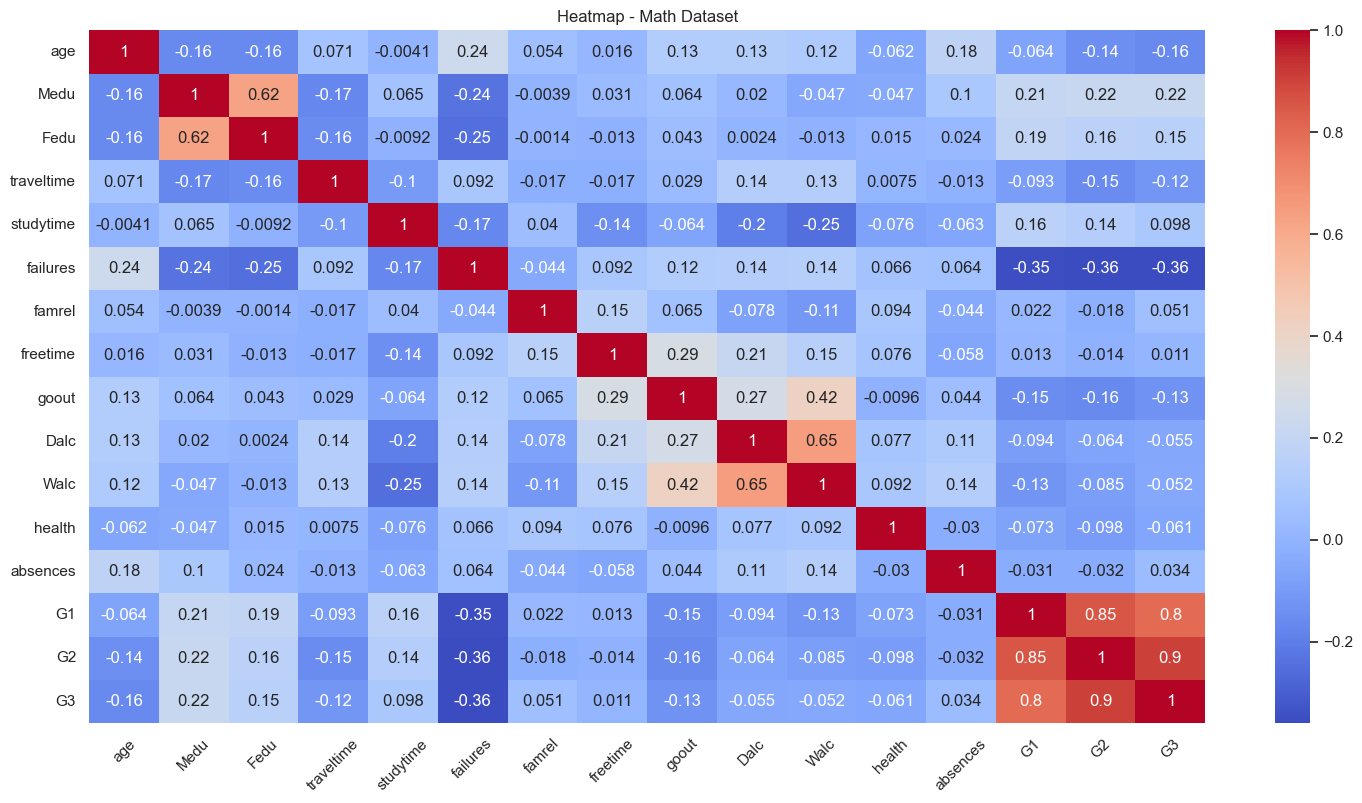

In [4]:
import seaborn as sns

categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
                        'nursery',	'higher', 'internet', 'romantic']
numeric_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

plt.figure(figsize=(18, 9))
sns.set_theme(style='whitegrid')
corr = math_df.drop(columns=categorical_features).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("Heatmap - Math Dataset")
plt.show()

We can see that all numeric features are not highly correlated (pairwise) from each other. The three target labels were highly correlated, but these will not be used in clustering.

Since no features are highly correlated, none will be removed before clustering.

## Data Preprocessing

### Feature Encoding

In [5]:
# Separate the labels from the features
X_math = math_df.drop(columns=['G1', 'G2', 'G3'])
X_por = por_df.drop(columns=['G1', 'G2', 'G3'])
y_math = math_df[['G1', 'G2', 'G3']]
y_por = por_df[['G1', 'G2', 'G3']]

# Encode categorical features (easier to use get_dummies)
X_math_encoded = pd.get_dummies(X_math, columns=categorical_features, drop_first=True)
X_por_encoded = pd.get_dummies(X_por, columns=categorical_features, drop_first=True)

# Convert Boolean columns to int
X_math_encoded[X_math_encoded.select_dtypes('bool').columns] = X_math_encoded.select_dtypes('bool').astype(int)
X_por_encoded[X_por_encoded.select_dtypes('bool').columns] = X_por_encoded.select_dtypes('bool').astype(int)

display(X_math_encoded)
display(X_por_encoded)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
0        4     1     1       3         6          0      0          1   
1        3     1     1       3         4          0      0          1   
2        2     2     3       3        10          0      0          1   
3        2     1     1       5         2          0      0          1   
4        2     1     2       5         4          0      0          1   
..     ...   ...   ...     ...       ...        ...    ...        ...   
390      4     4     5       4        11          1      1          1   
391      5     3     4       2         3          1      1          1   
392      3     3     3       3         3          1      1          0   
393      1     3     4       5         0          1      1          0   
394      3     3     3       5         5          1      1          1   

     famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  Mjob_services  \
0              0          0            0           0              0   
1              0          1            0           0              0   
2              1          1            0           0              0   
3              0          1            1           0              0   
4              0          1            0           1              0   
..           ...        ...          ...         ...            ...   
390            1          0            0           0              1   
391            1          1            0           0              1   
392            0          1            0           1              0   
393            1          1            0           0              1   
394            1          1            0           1              0   

     Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0               0            0           0              0             1   
1               0            0           1              0             0   
2               0            0           1              0             0   
3               0            0           0              1             0   
4               0            0           1              0             0   
..            ...          ...         ...            ...           ...   
390             0            0           0              1             0   
391             0            0           0              1             0   
392             0            0           1              0             0   
393             0            0           1              0             0   
394             0            0           0              0             0   

     reason_home  reason_other  reason_reputation  guardian_mother  \
0              0             0                  0                1   
1              0             0                  0                0   
2              0             1                  0                1   
3              1             0                  0                1   
4              1             0                  0                0   
..           ...           ...                ...    

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         0       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
644   19     2     3           1          3         1       5         4   
645   18     3     1           1          2         0       4         3   
646   18     1     1           2          2         0       1         1   
647   17     3     1           2          1         0       2         4   
648   18     3     2           3          1         0       4         4   

     goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
0        4     1     1       3         4          0      0          1   
1        3     1     1       3         2          0      0          1   
2        2     2     3       3         6          0      0          1   
3        2     1     1       5         0          0      0          1   
4        2     1     2       5         0          0      0          1   
..     ...   ...   ...     ...       ...        ...    ...        ...   
644      2     1     2       5         4          1      0          0   
645      4     1     1       1         4          1      0          1   
646      1     1     1       5         6          1      0          1   
647      5     3     4       2         6          1      1          1   
648      1     3     4       5         4          1      1          0   

     famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  Mjob_services  \
0              0          0            0           0              0   
1              0          1            0           0              0   
2              1          1            0           0              0   
3              0          1            1           0              0   
4              0          1            0           1              0   
..           ...        ...          ...         ...            ...   
644            0          1            0           0              1   
645            1          1            0           0              0   
646            0          1            0           1              0   
647            1          1            0           0              1   
648            1          1            0           0              1   

     Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0               0            0           0              0             1   
1               0            0           1              0             0   
2               0            0           1              0             0   
3               0            0           0              1             0   
4               0            0           1              0             0   
..            ...          ...         ...            ...           ...   
644             0            0           1              0             0   
645             1            0           0              1             0   
646             0            0           1              0             0   
647             0            0           0              1             0   
648             0            0           1              0             0   

     reason_home  reason_other  reason_reputation  guardian_mother  \
0              0             0                  0                1   
1              0             0                  0                0   
2              0             1                  0                1   
3              1             0                  0                1   
4              1             0                  0                0   
..           ...           ...                ...    

In [6]:
# Create a combined math and portuguese dataset
X_encoded = pd.concat([X_math_encoded, X_por_encoded], ignore_index=True)
X_encoded['subject'] = 0
X_encoded.loc[395:, 'subject'] = 1
display(X_encoded)

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0      18     4     4           2          2         0       4         3   
1      17     1     1           1          2         0       5         3   
2      15     1     1           1          2         3       4         3   
3      15     4     2           1          3         0       3         2   
4      16     3     3           1          2         0       4         3   
...   ...   ...   ...         ...        ...       ...     ...       ...   
1039   19     2     3           1          3         1       5         4   
1040   18     3     1           1          2         0       4         3   
1041   18     1     1           2          2         0       1         1   
1042   17     3     1           2          1         0       2         4   
1043   18     3     2           3          1         0       4         4   

      goout  Dalc  Walc  health  absences  school_MS  sex_M  address_U  \
0         4     1     1       3         6          0      0          1   
1         3     1     1       3         4          0      0          1   
2         2     2     3       3        10          0      0          1   
3         2     1     1       5         2          0      0          1   
4         2     1     2       5         4          0      0          1   
...     ...   ...   ...     ...       ...        ...    ...        ...   
1039      2     1     2       5         4          1      0          0   
1040      4     1     1       1         4          1      0          1   
1041      1     1     1       5         6          1      0          1   
1042      5     3     4       2         6          1      1          1   
1043      1     3     4       5         4          1      1          0   

      famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  Mjob_services  \
0               0          0            0           0              0   
1               0          1            0           0              0   
2               1          1            0           0              0   
3               0          1            1           0              0   
4               0          1            0           1              0   
...           ...        ...          ...         ...            ...   
1039            0          1            0           0              1   
1040            1          1            0           0              0   
1041            0          1            0           1              0   
1042            1          1            0           0              1   
1043            1          1            0           0              1   

      Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  \
0                0            0           0              0             1   
1                0            0           1              0             0   
2                0            0           1              0             0   
3                0            0           0              1             0   
4                0            0           1              0             0   
...            ...          ...         ...            ...           ...   
1039             0            0           1              0             0   
1040             1            0           0              1             0   
1041             0            0           1              0             0   
1042             0            0           0              1             0   
1043             0            0           1              0             0   

      reason_home  reason_other  reason_reputation  guardian_mother  \
0               0             0                  0                1   
1               0             0                  0                0   
2               0             1                  0                1   
3               1             0                  0                1   
4               1             0                  0                0   


### Feature Scaling

In [7]:
# The two datasets were scaled separately since they will be clustered separately
# Only numeric features will be scaled. The categorical features were already one-hot encoded

# Create a copy to create a separate scaled df
X_math_scaled = X_math_encoded
X_por_scaled = X_por_encoded
X_scaled = X_encoded

X_math_scaled[numeric_features] = StandardScaler().fit_transform(X_math_scaled[numeric_features])
X_por_scaled[numeric_features] = StandardScaler().fit_transform(X_por_scaled[numeric_features])
X_scaled[numeric_features] = StandardScaler().fit_transform(X_scaled[numeric_features])

# Create another df which scales all features (for experimental purposes)
# X_math_scaled_full = StandardScaler().fit_transform(X_math_scaled)
# X_por_scaled_full = StandardScaler().fit_transform(X_por_scaled)
# X_math_scaled_full = pd.DataFrame(X_math_scaled_full, columns=X_math_scaled.columns)
# X_por_scaled_full = pd.DataFrame(X_por_scaled_full, columns=X_por_scaled.columns)

display(X_scaled)

age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0     1.027889  1.242077  1.466302    0.652210   0.035606 -0.403106  0.068788   
1     0.221035 -1.426089 -1.262431   -0.715074   0.035606 -0.403106  1.140653   
2    -1.392674 -1.426089 -1.262431   -0.715074   0.035606  4.171268  0.068788   
3    -1.392674  1.242077 -0.352853   -0.715074   1.234713 -0.403106 -1.003076   
4    -0.585820  0.352689  0.556724   -0.715074   0.035606 -0.403106  0.068788   
...        ...       ...       ...         ...        ...       ...       ...   
1039  1.834744 -0.536700  0.556724   -0.715074   1.234713  1.121686  1.140653   
1040  1.027889  0.352689 -1.262431   -0.715074   0.035606 -0.403106  0.068788   
1041  1.027889 -1.426089 -1.262431    0.652210   0.035606 -0.403106 -3.146806   
1042  0.221035  0.352689 -1.262431    0.652210  -1.163502 -0.403106 -2.074941   
1043  1.027889  0.352689 -0.352853    2.019494  -1.163502 -0.403106  0.068788   

      freetime     goout      Dalc      Walc    health  absences  school_MS  \
0    -0.195099  0.732511 -0.542374 -0.999995 -0.381387  0.252155          0   
1    -0.195099 -0.135527 -0.542374 -0.999995 -0.381387 -0.070060          0   
2    -0.195099 -1.003566  0.554987  0.557044 -0.381387  0.896584          0   
3    -1.165019 -1.003566 -0.542374 -0.999995  1.023086 -0.392275          0   
4    -0.195099 -1.003566 -0.542374 -0.221475  1.023086 -0.070060          0   
...        ...       ...       ...       ...       ...       ...        ...   
1039  0.774821 -1.003566 -0.542374 -0.221475  1.023086 -0.070060          1   
1040 -0.195099  0.732511 -0.542374 -0.999995 -1.785861 -0.070060          1   
1041 -2.134939 -1.871604 -0.542374 -0.999995  1.023086  0.252155          1   
1042  0.774821  1.600550  1.652347  1.335564 -1.083624  0.252155          1   
1043  0.774821 -1.871604  1.652347  1.335564  1.023086 -0.070060          1   

      sex_M  address_U  famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  \
0         0          1            0          0            0           0   
1         0          1            0          1            0           0   
2         0          1            1          1            0           0   
3         0          1            0          1            1           0   
4         0          1            0          1            0           1   
...     ...        ...          ...        ...          ...         ...   
1039      0          0            0          1            0           0   
1040      0          1            1          1            0           0   
1041      0          1            0          1            0           1   
1042      1          1            1          1            0           0   
1043      1          0            1          1            0           0   

      Mjob_services  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0                 0             0            0           0              0   
1                 0             0            0           1              0   
2                 0             0            0           1              0   
3                 0             0            0           0              1   
4                 0             0            0           1              0   
...             ...           ...          ...         ...            ...   
1039              1             0            0           1              0   
1040              0             1            0           0              1   
1041              0             0            0           1              0   
1042              1             0            0           0              1   
1043              1             0            0           1              0   

      Fjob_teacher  reason_home  reason_other  reason_reputation  \
0                1            0             0                  0   
1                0            0             0                  0   
2                0            0             1              

Only the numeric features were scaled, while categorical ones are one-hot encoded. We can use these datasets for clustering.

## Create clustering models

### K-Means on Math Dataset

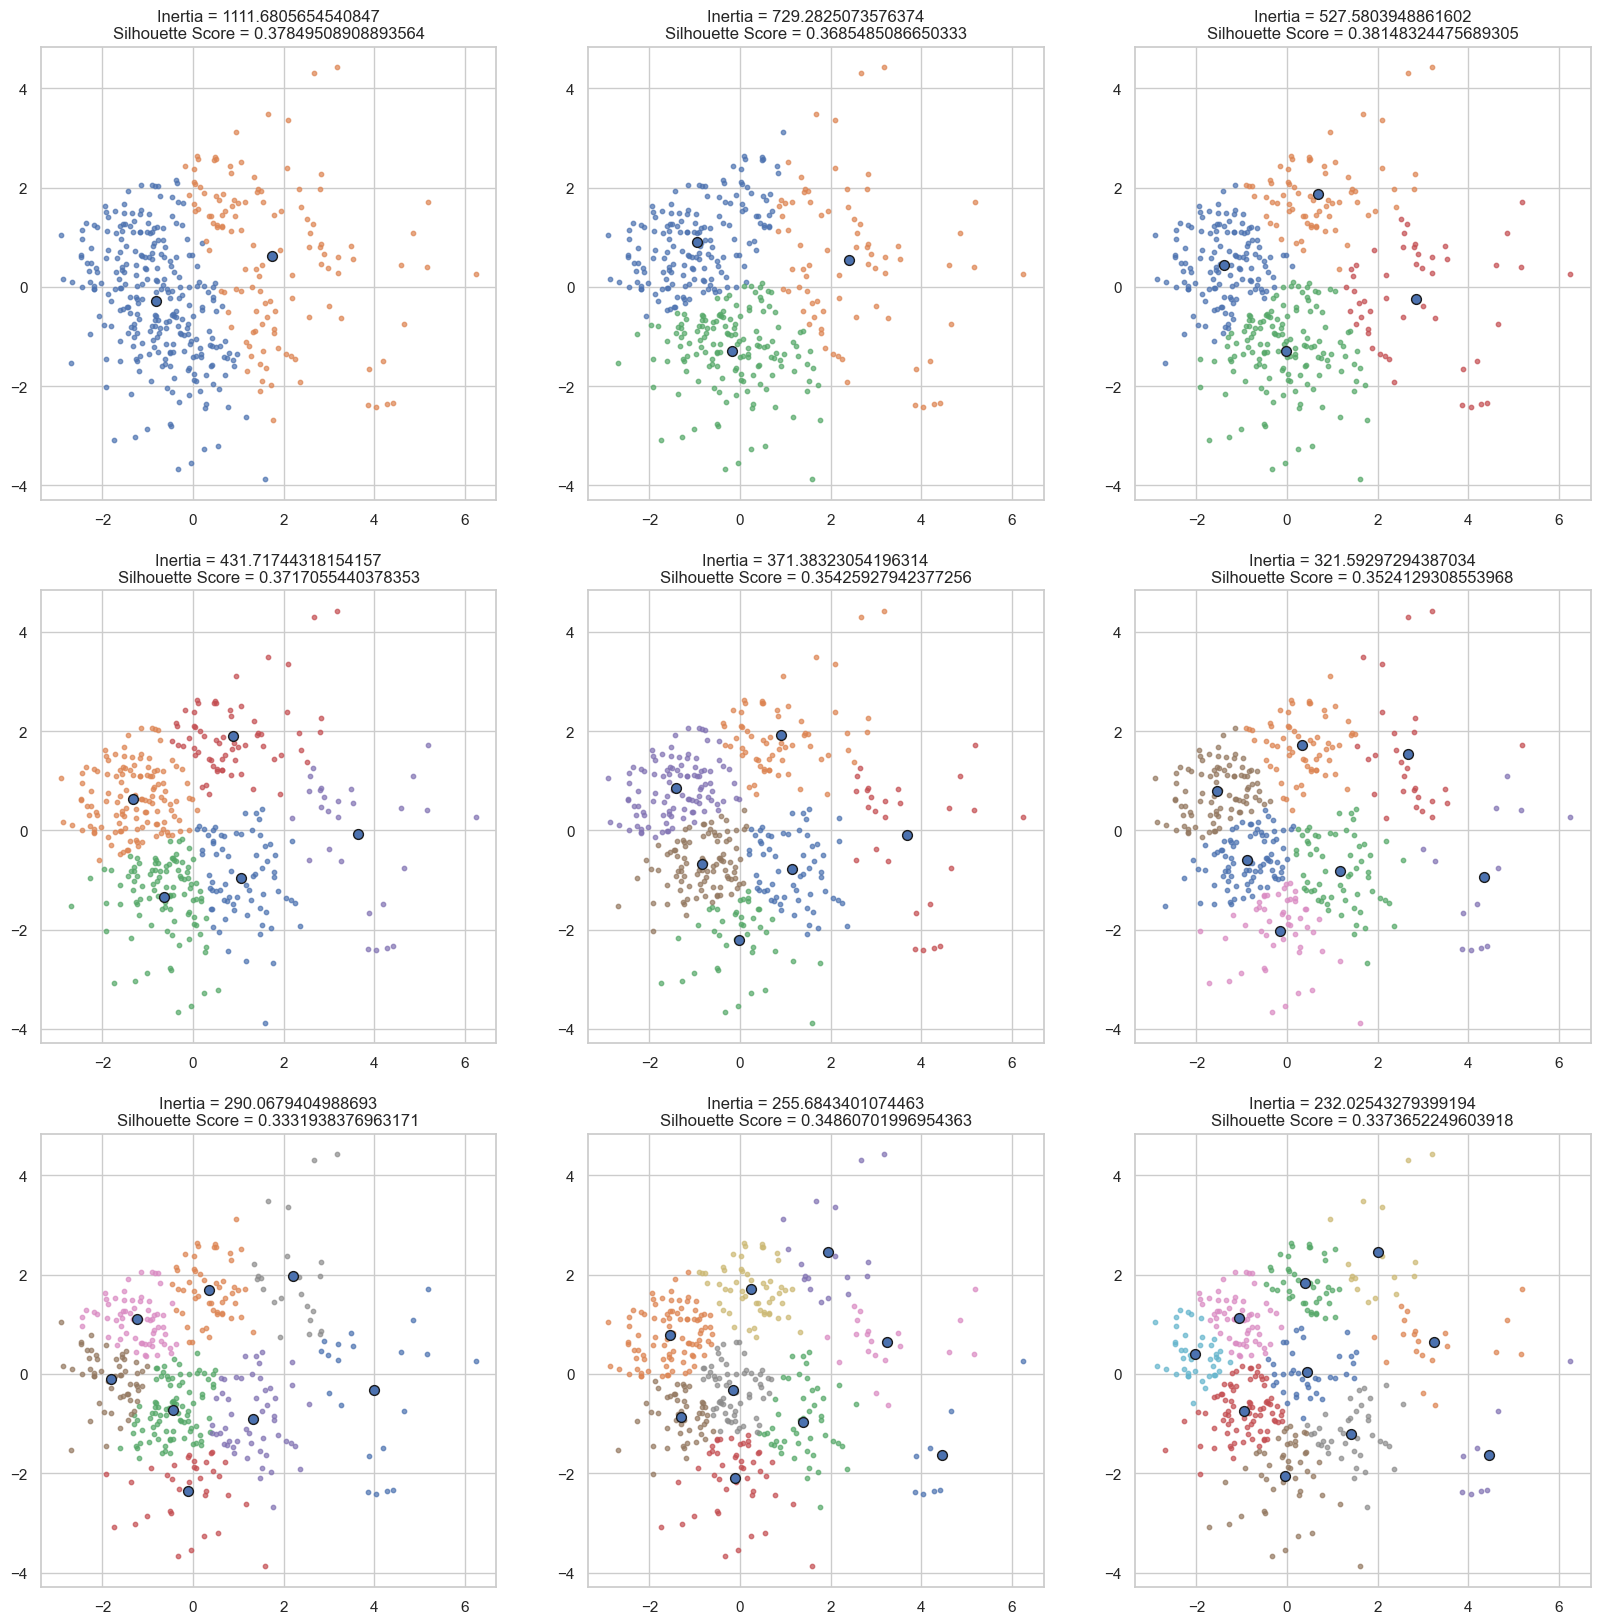

In [8]:
# Apply PCA on dataframe (for visualization and pre-clustering)
from sklearn.decomposition import PCA
m_pca = PCA(n_components=2)
X_math_pca = m_pca.fit_transform(X_math_scaled)

# Try with math dataset first
math_inertia_values = []
math_silhouette_avgs = []

fig1 = plt.figure(figsize=(20, 20))  

for i in range(2, 11):  
    m_kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42).fit(X_math_pca) 

    m_cluster_labels = m_kmeans.labels_  
    m_centroids = m_kmeans.cluster_centers_ 

    math_inertia_values.append(m_kmeans.inertia_)  
    m_silhouette_avg = silhouette_score(X_math_pca, m_cluster_labels)  
    math_silhouette_avgs.append(m_silhouette_avg)

    # Plot the clustering results
    ax = fig1.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_math_pca[m_cluster_labels == j, 0], X_math_pca[m_cluster_labels == j, 1], s=10, alpha=0.7)  
    ax.scatter(m_centroids[:, 0], m_centroids[:, 1], s=50, color='b', edgecolor='k')  

    ax.set_title(f"Inertia = {m_kmeans.inertia_}\nSilhouette Score = {m_silhouette_avg}")  

Best K on Math Dataset: <b>4</b>.

### K-Means on Portuguese Dataset

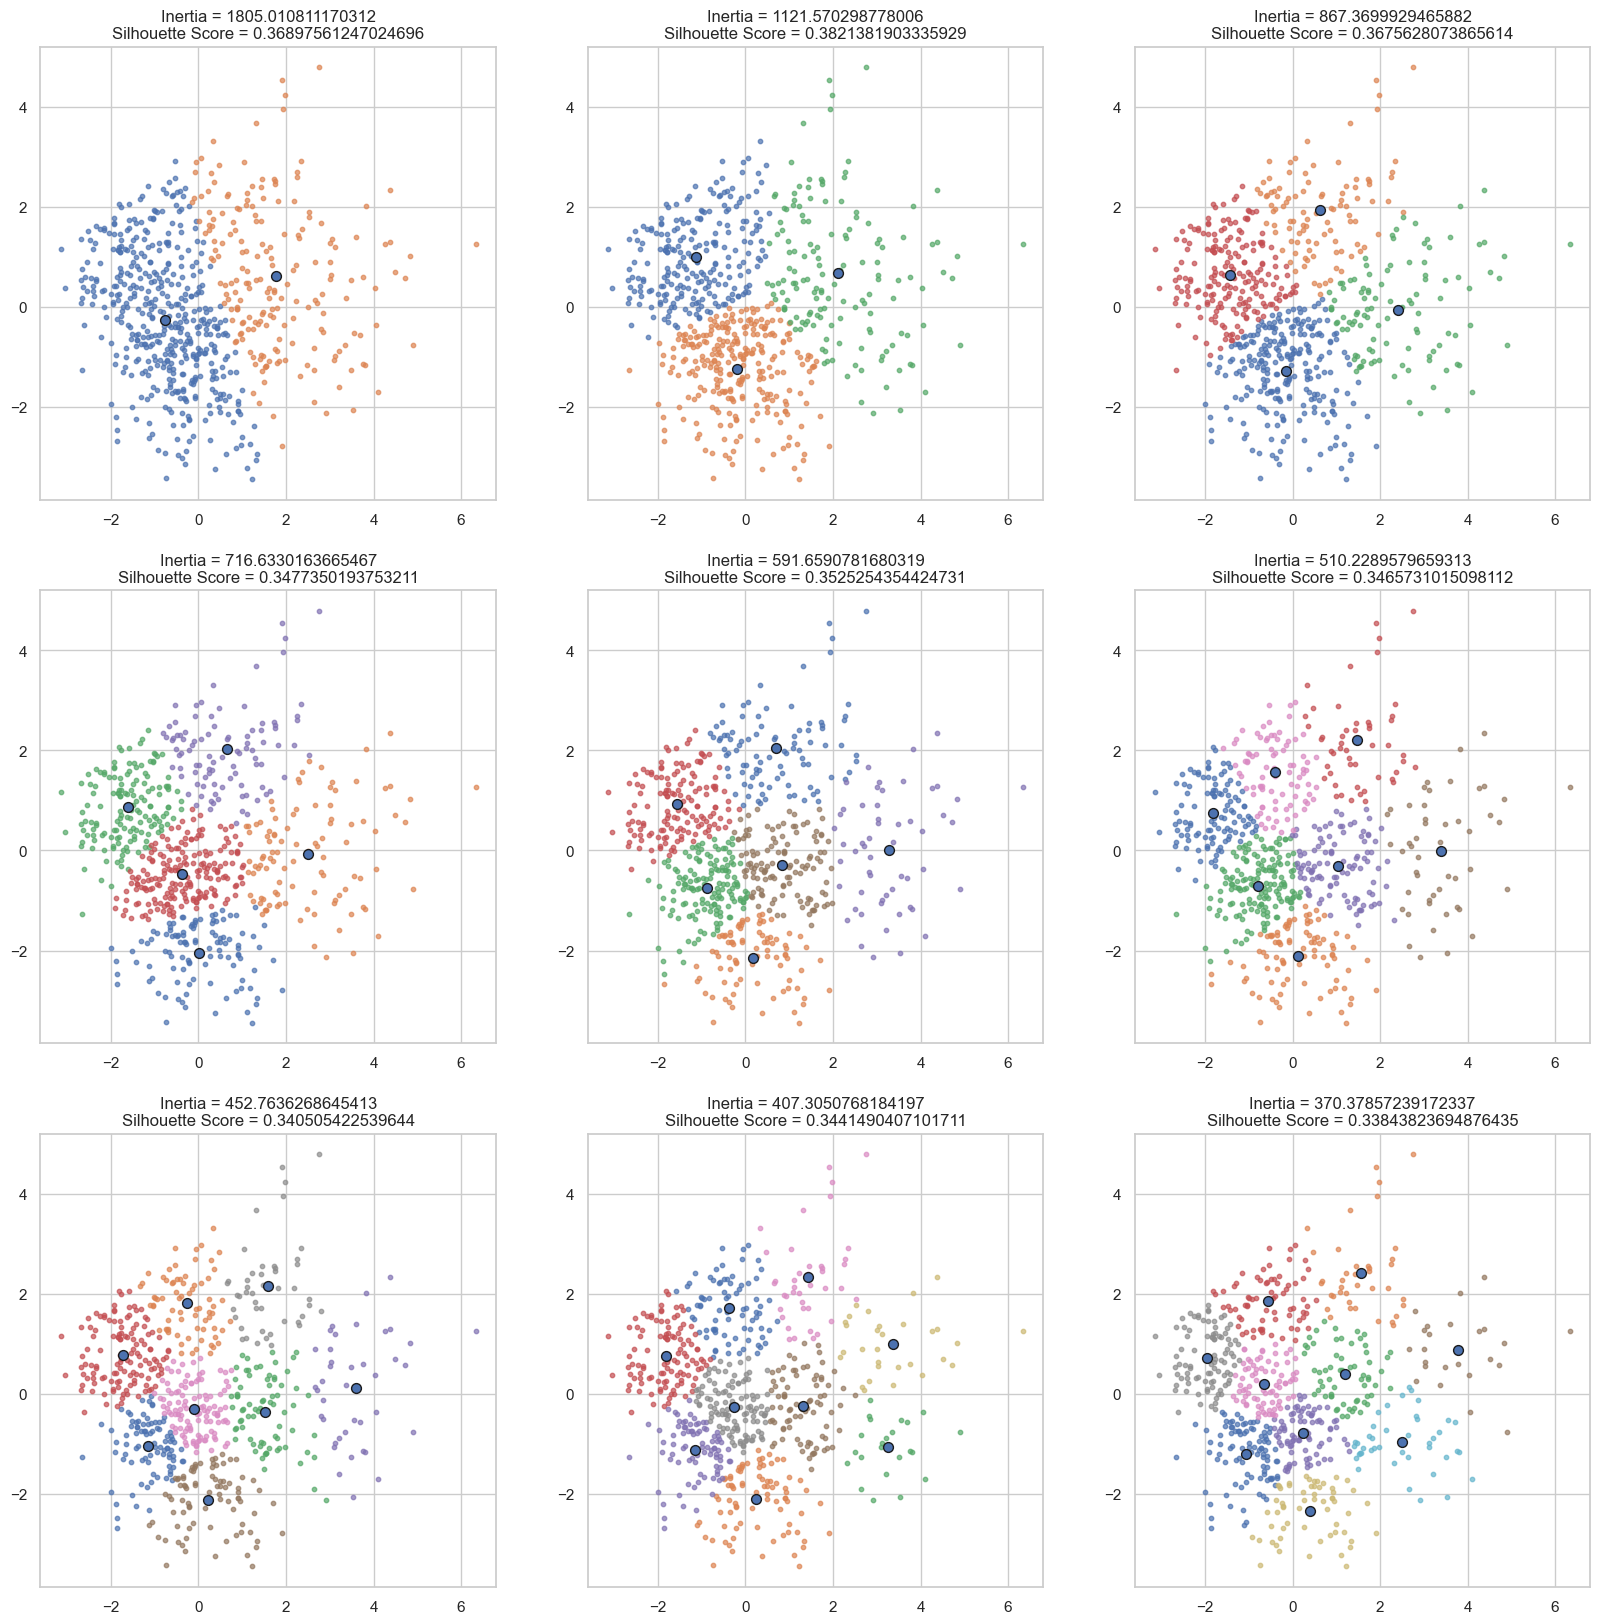

In [9]:
p_pca = PCA(n_components=2)
X_por_pca = p_pca.fit_transform(X_por_scaled)

por_inertia_values = []
por_silhouette_avgs = []

fig2 = plt.figure(figsize=(20, 20))  

for i in range(2, 11):  
    p_kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42).fit(X_por_pca) 

    p_cluster_labels = p_kmeans.labels_  
    p_centroids = p_kmeans.cluster_centers_ 

    por_inertia_values.append(p_kmeans.inertia_)  
    p_silhouette_avg = silhouette_score(X_por_pca, p_cluster_labels)  
    por_silhouette_avgs.append(p_silhouette_avg)

    # Plot the clustering results
    ax = fig2.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_por_pca[p_cluster_labels == j, 0], X_por_pca[p_cluster_labels == j, 1], s=10, alpha=0.7)  
    ax.scatter(p_centroids[:, 0], p_centroids[:, 1], s=50, color='b', edgecolor='k')  

    ax.set_title(f"Inertia = {p_kmeans.inertia_}\nSilhouette Score = {p_silhouette_avg}")  

Best K on Portuguese dataset: <b>3</b>.

Using k-means clustering yields similar results for both datasets at n_clusters from 2 to 4. We can try to use k-means clustering on the merged math and Portuguese datasets.

### K-Means on Combined Dataset

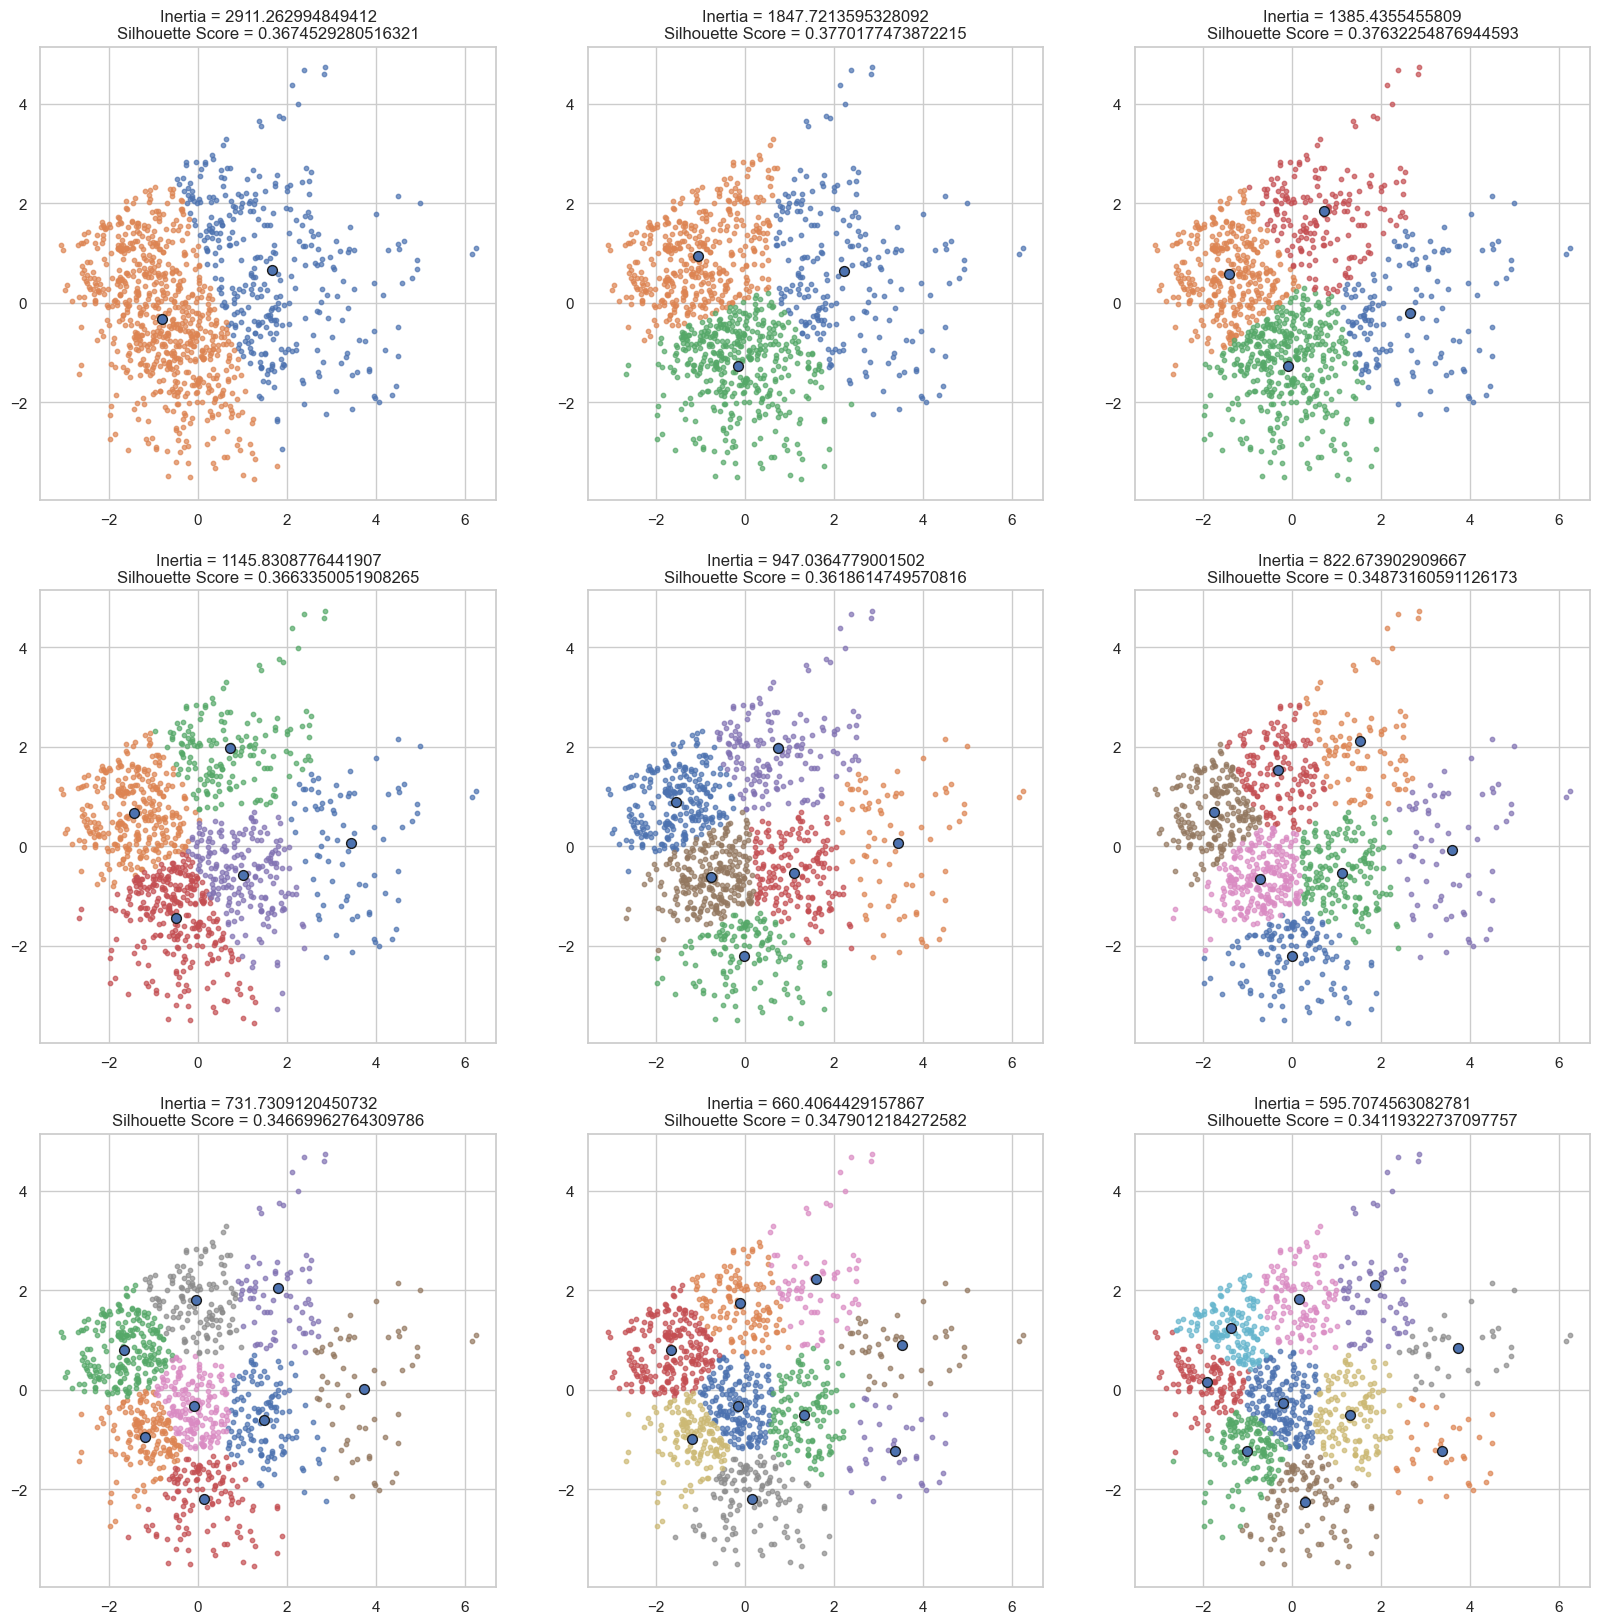

In [10]:
c_pca = PCA(n_components=2)
X_pca = c_pca.fit_transform(X_scaled)

com_inertia_values = []
com_silhouette_avgs = []

fig2_1 = plt.figure(figsize=(20, 20))  

for i in range(2, 11):  
    c_kmeans = KMeans(n_clusters=i, n_init=10, init='k-means++', random_state=42).fit(X_pca) 

    c_cluster_labels = c_kmeans.labels_  
    c_centroids = c_kmeans.cluster_centers_ 

    com_inertia_values.append(c_kmeans.inertia_)  
    c_silhouette_avg = silhouette_score(X_pca, c_cluster_labels)  
    com_silhouette_avgs.append(c_silhouette_avg)

    # Plot the clustering results
    ax = fig2_1.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_pca[c_cluster_labels == j, 0], X_pca[c_cluster_labels == j, 1], s=10, alpha=0.7)  
    ax.scatter(c_centroids[:, 0], c_centroids[:, 1], s=50, color='b', edgecolor='k')  

    ax.set_title(f"Inertia = {c_kmeans.inertia_}\nSilhouette Score = {c_silhouette_avg}")  

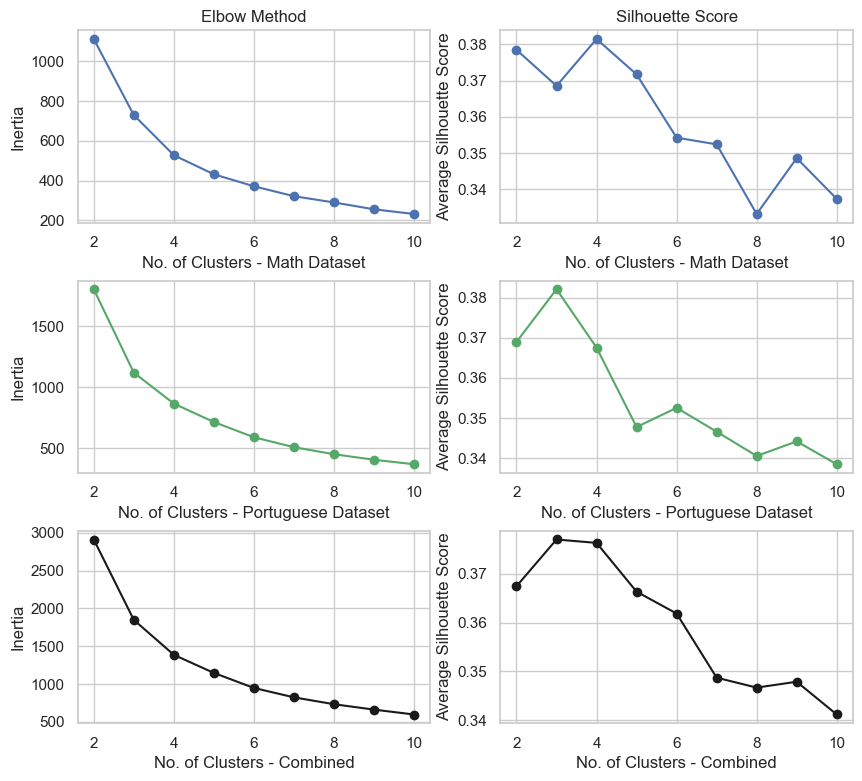

In [11]:
plt.figure(figsize=(10, 9))  

plt.subplot(321)
plt.plot(np.arange(2, 11), math_inertia_values, 'o-b')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Math Dataset')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(322)
plt.plot(np.arange(2, 11), math_silhouette_avgs, 'o-b')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Math Dataset')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(323)
plt.plot(np.arange(2, 11), por_inertia_values, 'o-g')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Portuguese Dataset')
plt.ylabel('Inertia')

plt.subplot(324)
plt.plot(np.arange(2, 11), por_silhouette_avgs, 'o-g')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Portuguese Dataset')
plt.ylabel('Average Silhouette Score')

plt.subplot(325)
plt.plot(np.arange(2, 11), com_inertia_values, 'o-k')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Combined')
plt.ylabel('Inertia')

plt.subplot(326)
plt.plot(np.arange(2, 11), com_silhouette_avgs, 'o-k')  
plt.grid(True) 
plt.xlabel('No. of Clusters - Combined')
plt.ylabel('Average Silhouette Score')

plt.subplots_adjust(hspace=0.3)
plt.show()  

Using the visual cluster plots, elbow method, and local maximum silhouette scores as criteria, the best K-means model found using the combined dataset was: <b>3-clusters K-Means</b> with a silhouette score of <b>0.3770</b>.

### Agglomerative Clustering - Combined Dataset

#### Ward linkage

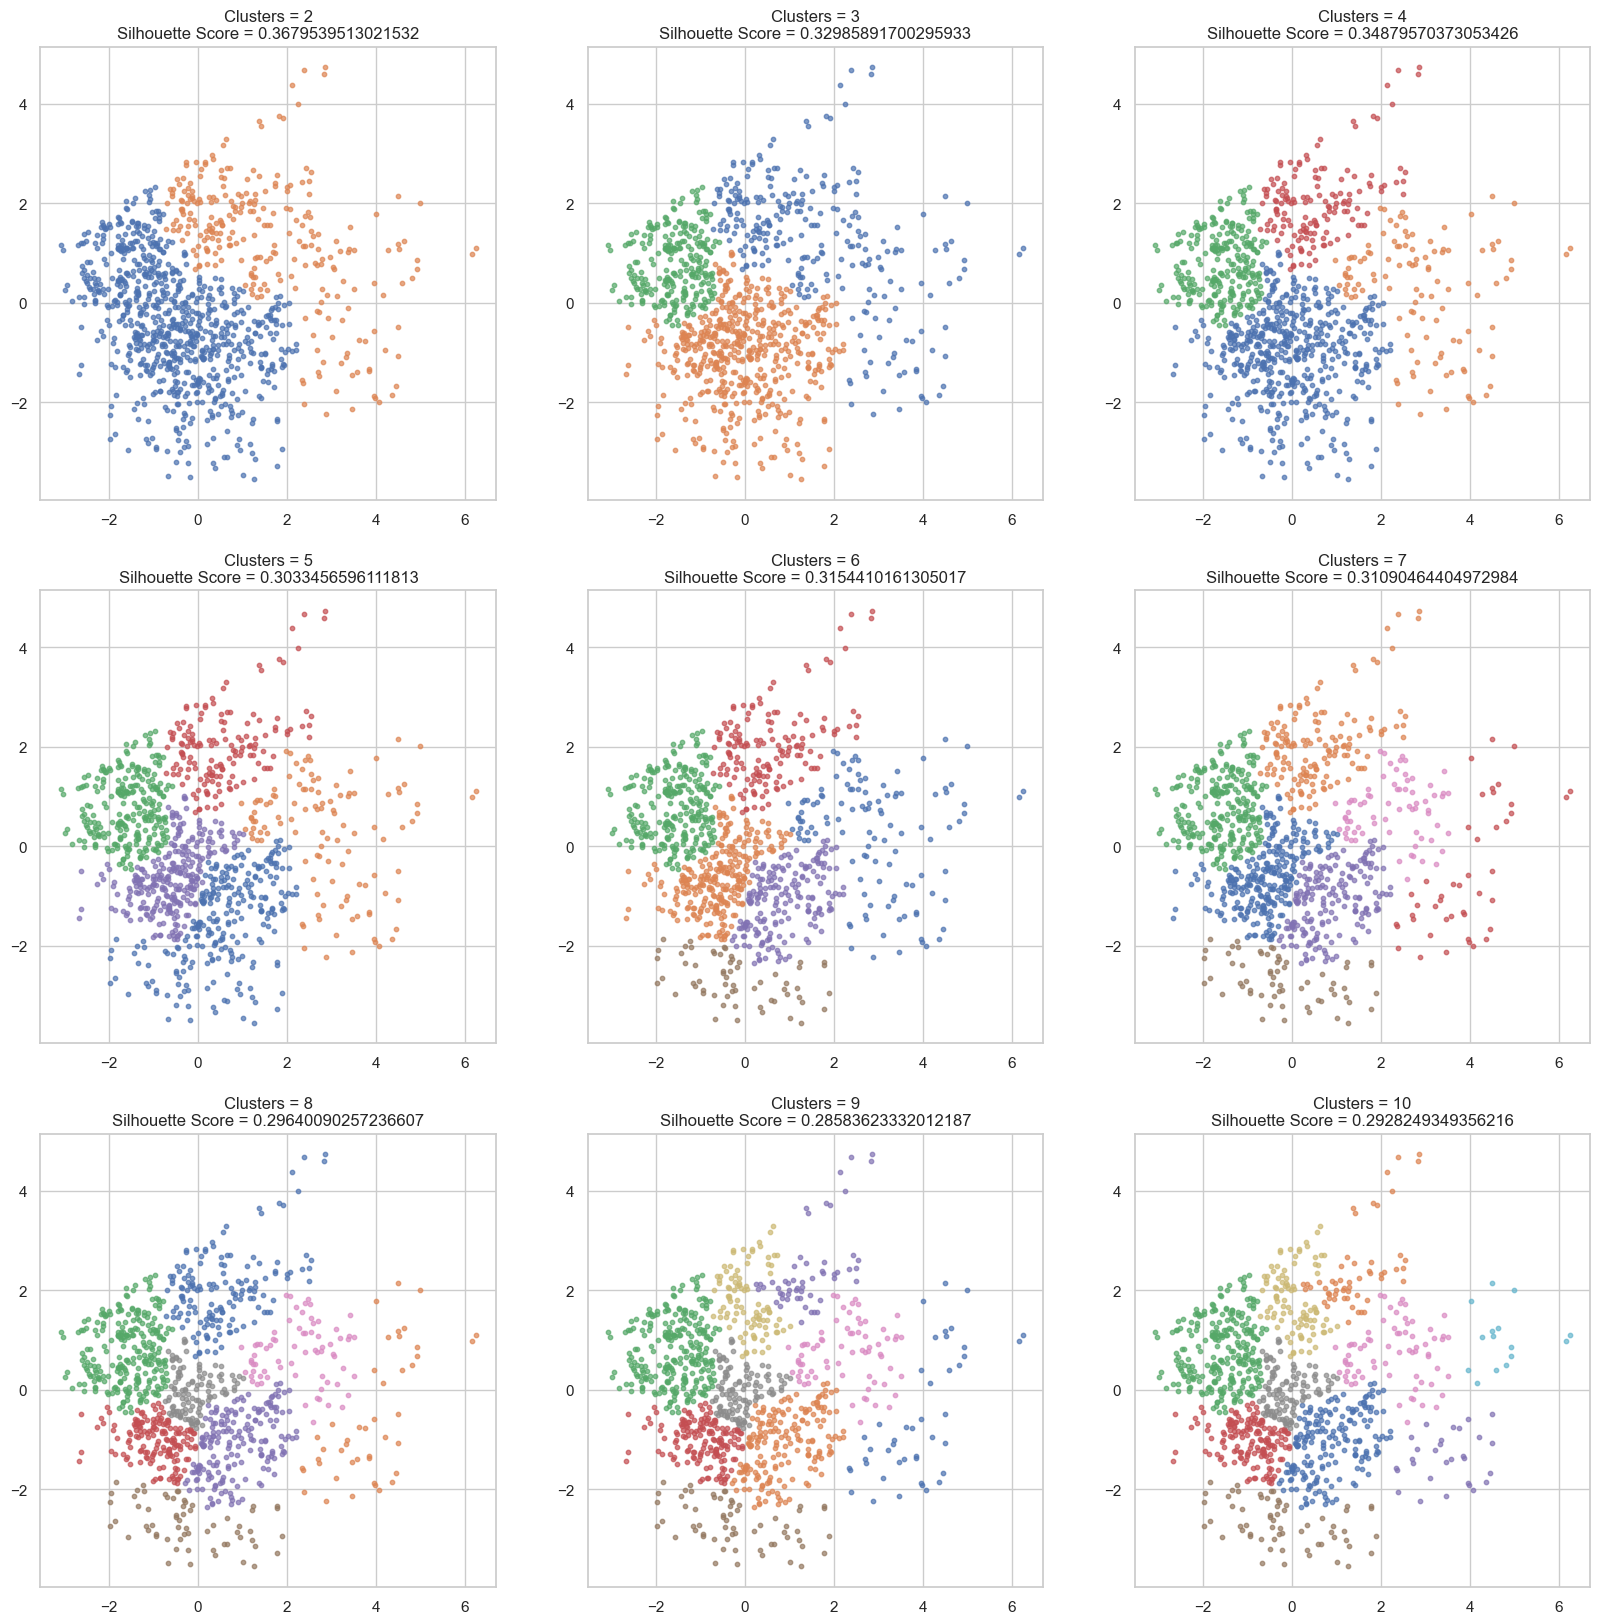

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_silhouette_avgs_1 = []
fig3 = plt.figure(figsize=(20, 20))

# Ward linkage
for i in range(2, 11):  
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='ward')

    agg_cluster_labels = agg_clust.fit_predict(X_pca)  
    agg_silhouette_avg = silhouette_score(X_pca, agg_cluster_labels)  
    agg_silhouette_avgs_1.append(agg_silhouette_avg)

    # Plot the clustering results
    ax = fig3.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_pca[agg_cluster_labels == j, 0], X_pca[agg_cluster_labels == j, 1], s=10, alpha=0.7)

    ax.set_title(f"Clusters = {i}\nSilhouette Score = {agg_silhouette_avg}")

#### Complete linkage

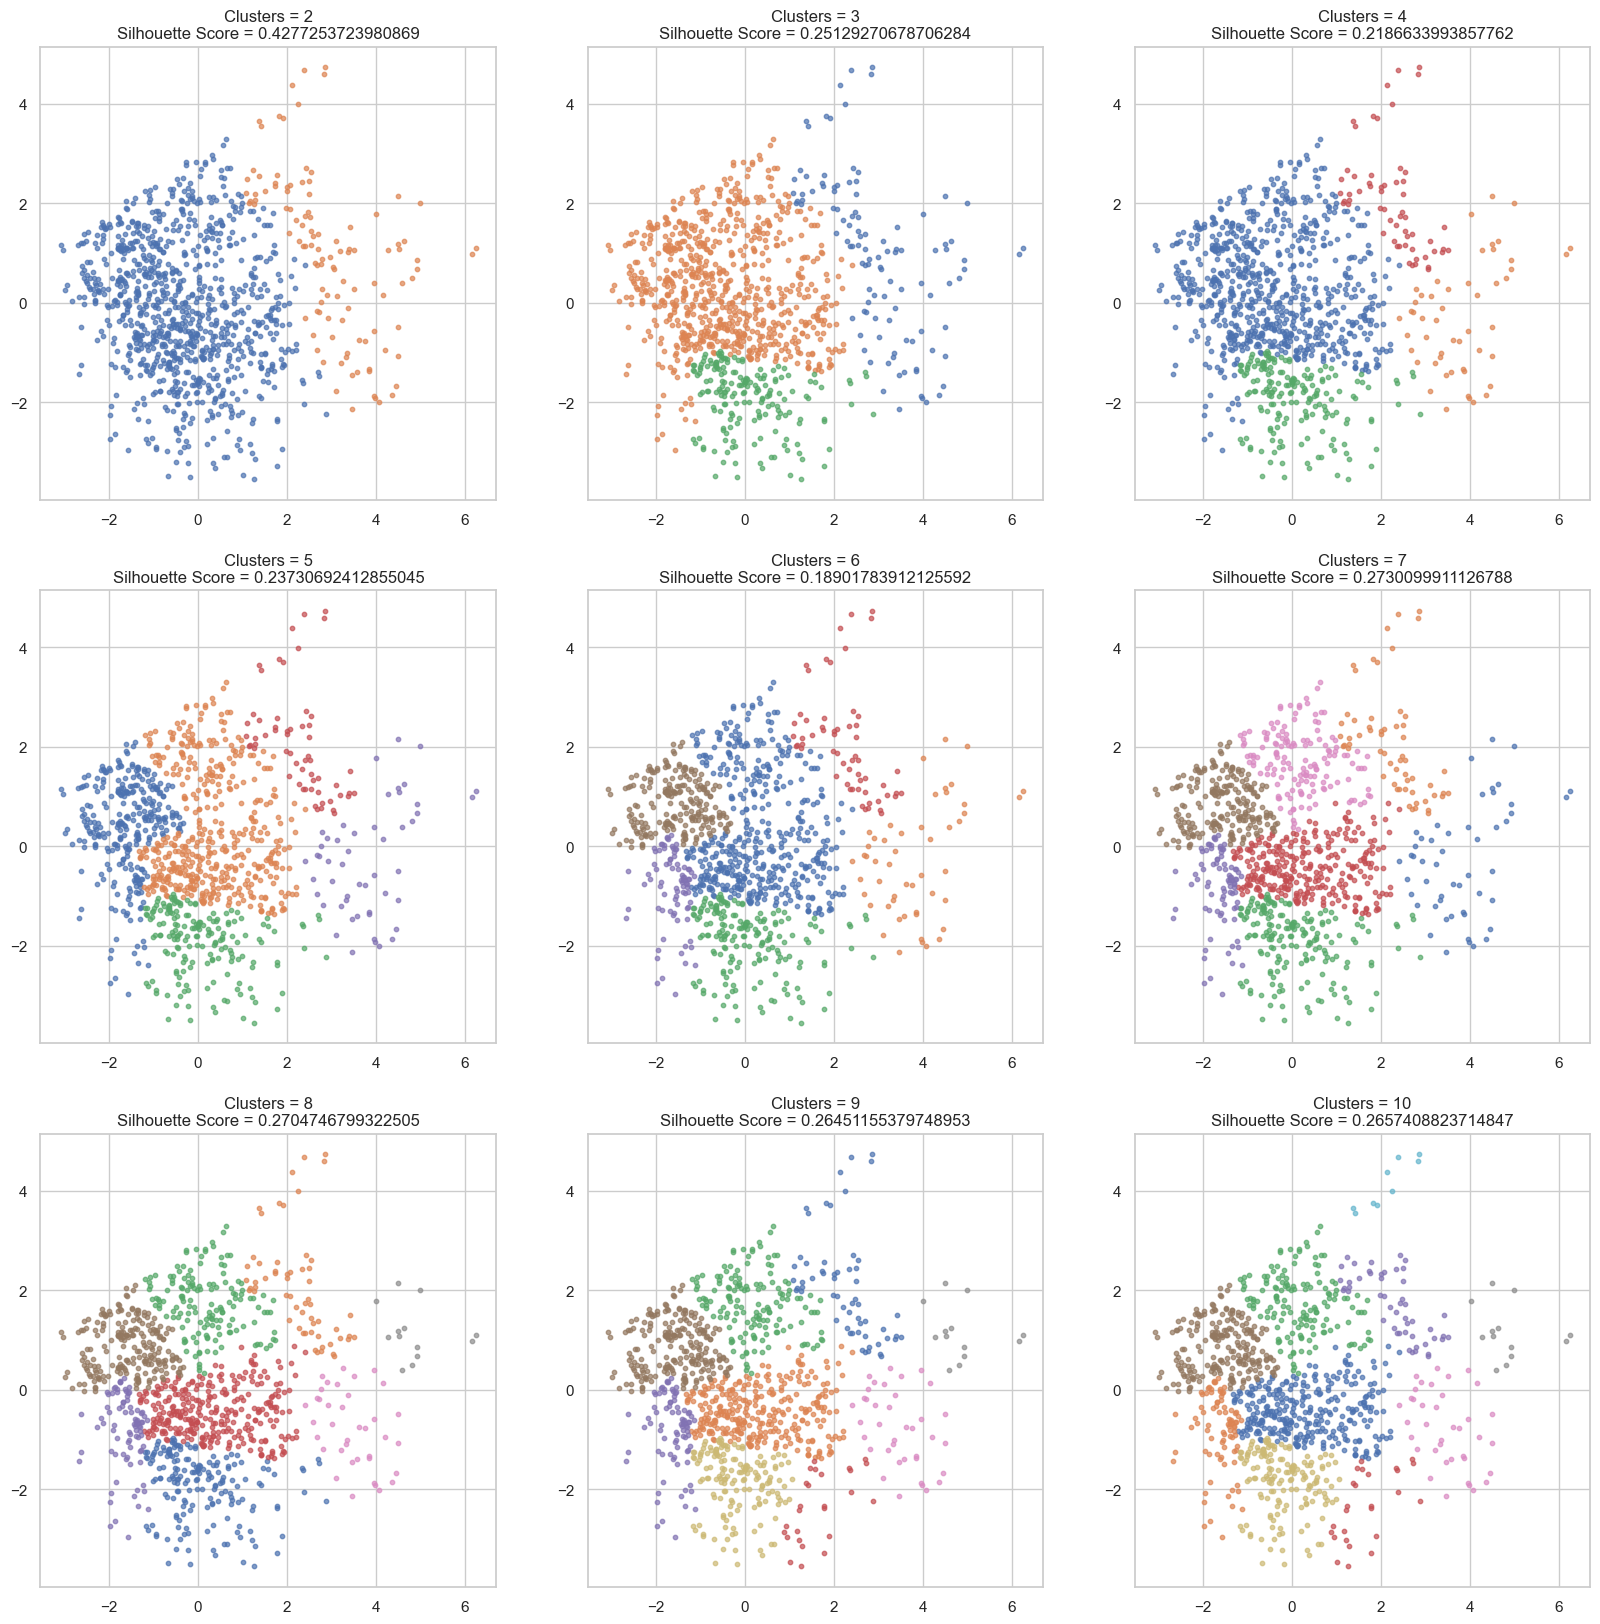

In [13]:
agg_silhouette_avgs_2 = []
fig4 = plt.figure(figsize=(20, 20))

# Complete linkage
for i in range(2, 11):  
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='complete')

    agg_cluster_labels = agg_clust.fit_predict(X_pca)  
    agg_silhouette_avg = silhouette_score(X_pca, agg_cluster_labels)  
    agg_silhouette_avgs_2.append(agg_silhouette_avg)

    # Plot the clustering results
    ax = fig4.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_pca[agg_cluster_labels == j, 0], X_pca[agg_cluster_labels == j, 1], s=10, alpha=0.7)

    ax.set_title(f"Clusters = {i}\nSilhouette Score = {agg_silhouette_avg}")

#### Average linkage

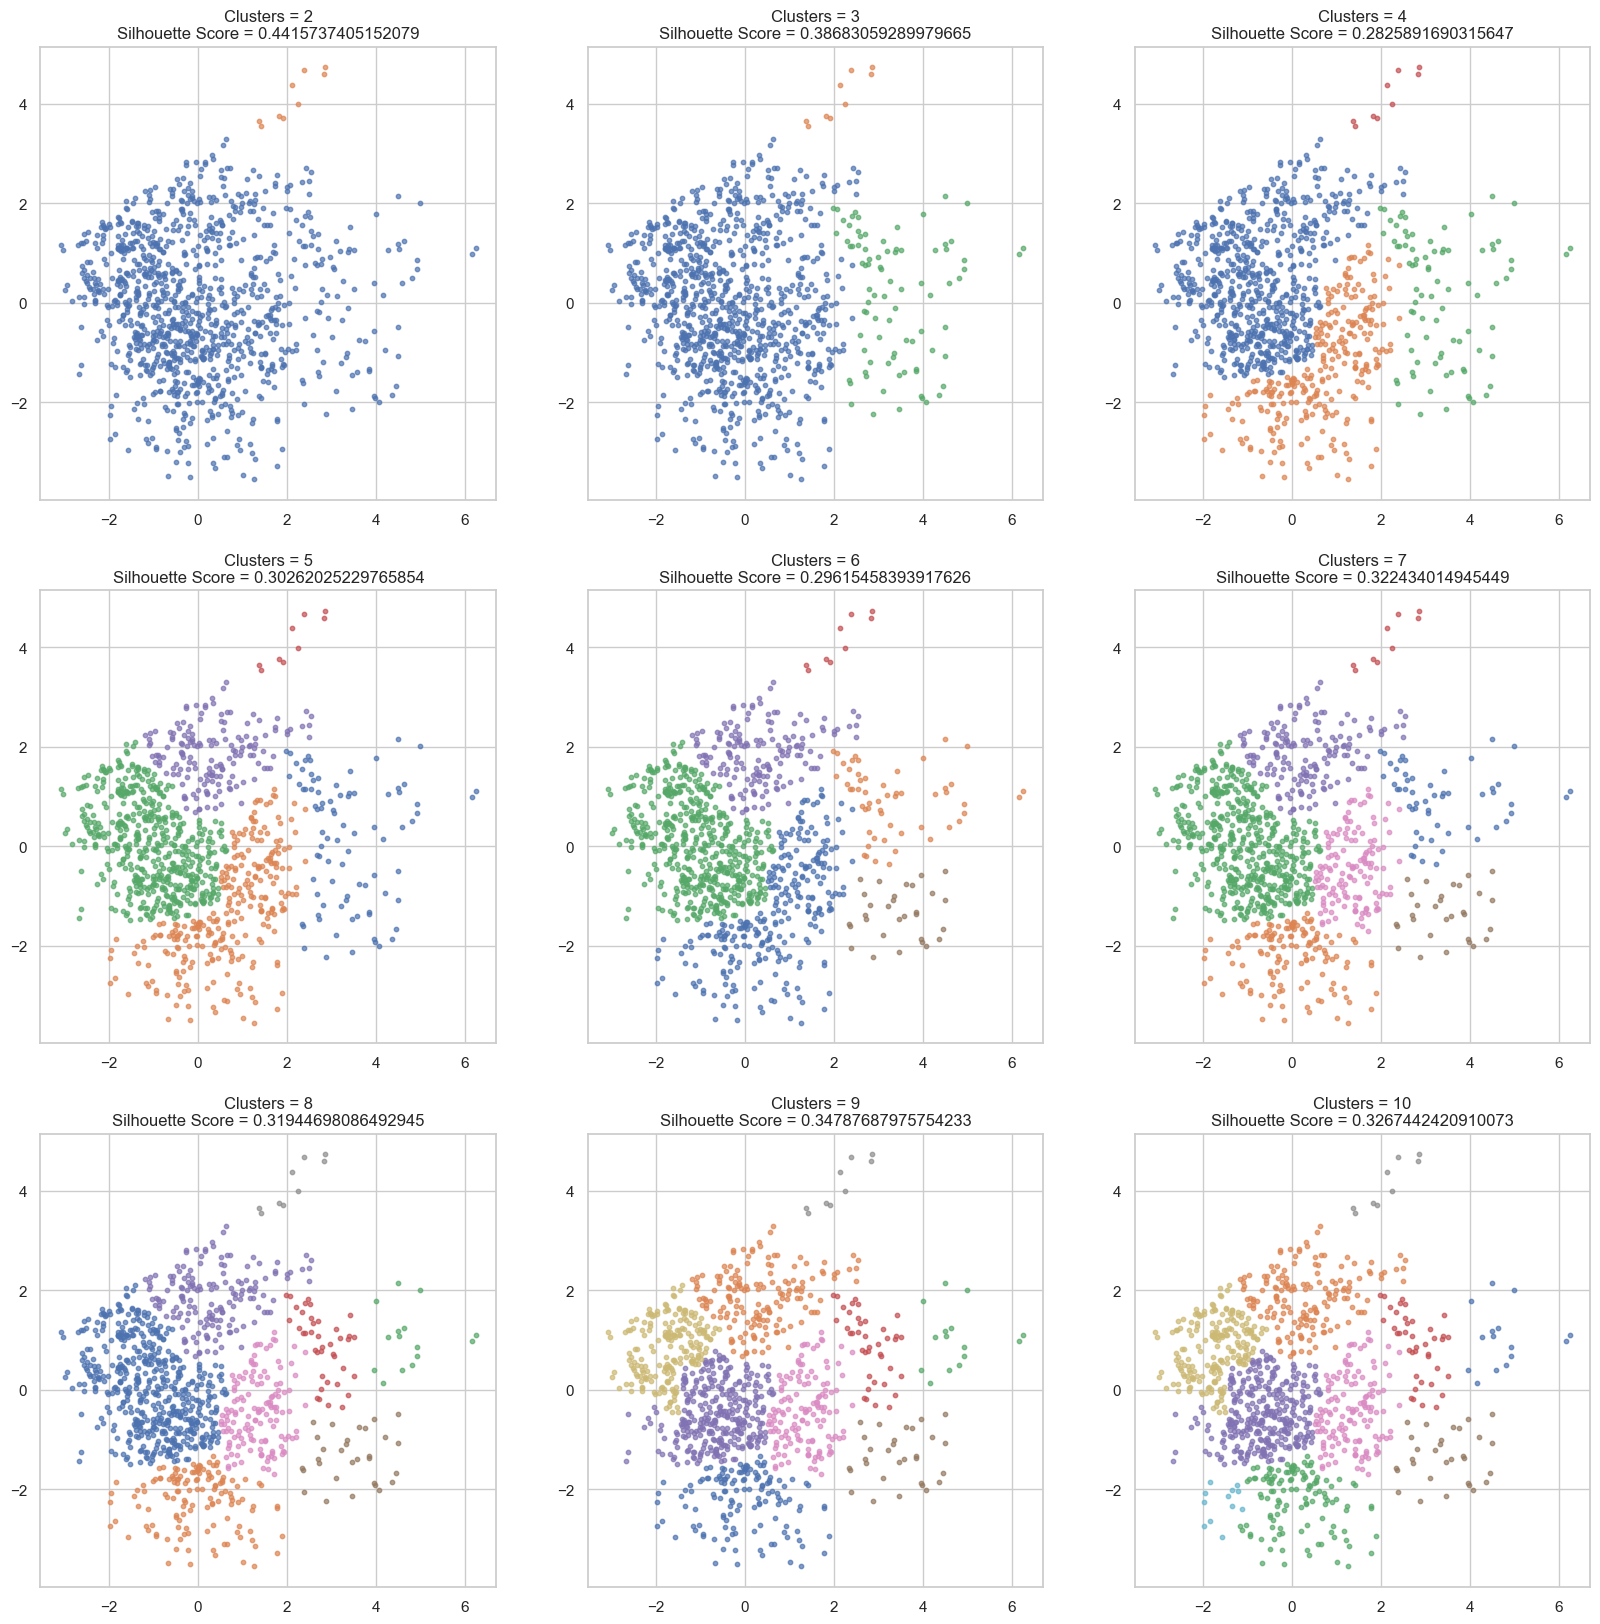

In [14]:
agg_silhouette_avgs_3 = []
fig5 = plt.figure(figsize=(20, 20))

# Average linkage
for i in range(2, 11):  
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='average')

    agg_cluster_labels = agg_clust.fit_predict(X_pca)  
    agg_silhouette_avg = silhouette_score(X_pca, agg_cluster_labels)  
    agg_silhouette_avgs_3.append(agg_silhouette_avg)

    # Plot the clustering results
    ax = fig5.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_pca[agg_cluster_labels == j, 0], X_pca[agg_cluster_labels == j, 1], s=10, alpha=0.7)

    ax.set_title(f"Clusters = {i}\nSilhouette Score = {agg_silhouette_avg}")

#### Single linkage

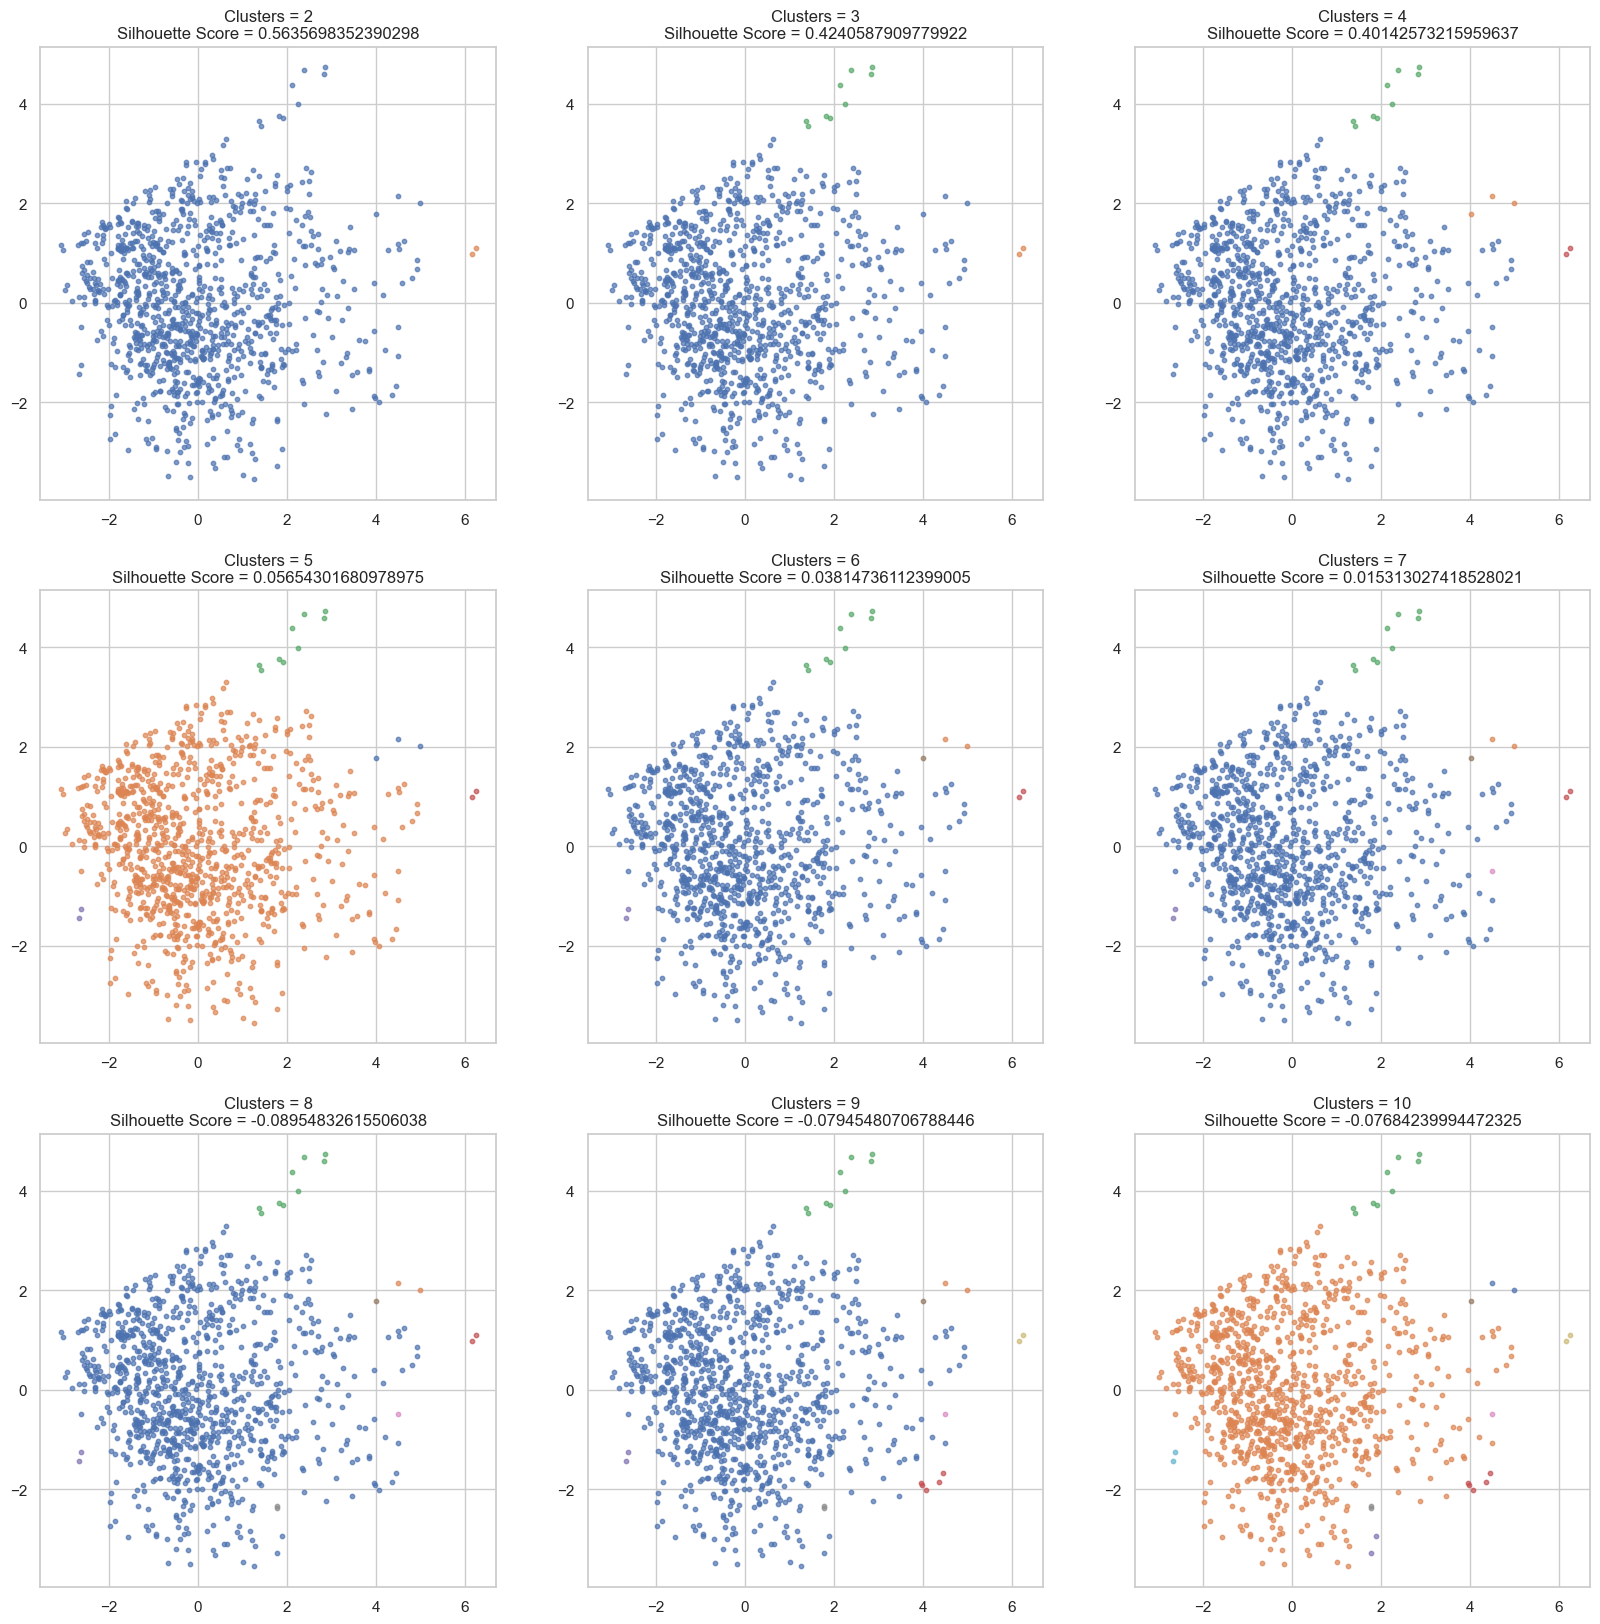

In [15]:
agg_silhouette_avgs_4 = []
fig6 = plt.figure(figsize=(20, 20))

# Single linkage
for i in range(2, 11):  
    agg_clust = AgglomerativeClustering(n_clusters=i, linkage='single')

    agg_cluster_labels = agg_clust.fit_predict(X_pca)  
    agg_silhouette_avg = silhouette_score(X_pca, agg_cluster_labels)  
    agg_silhouette_avgs_4.append(agg_silhouette_avg)

    # Plot the clustering results
    ax = fig6.add_subplot(330 + i - 1)
    
    for j in range(0, i):  
        ax.scatter(X_pca[agg_cluster_labels == j, 0], X_pca[agg_cluster_labels == j, 1], s=10, alpha=0.7)

    ax.set_title(f"Clusters = {i}\nSilhouette Score = {agg_silhouette_avg}")

#### Silhouette Scores

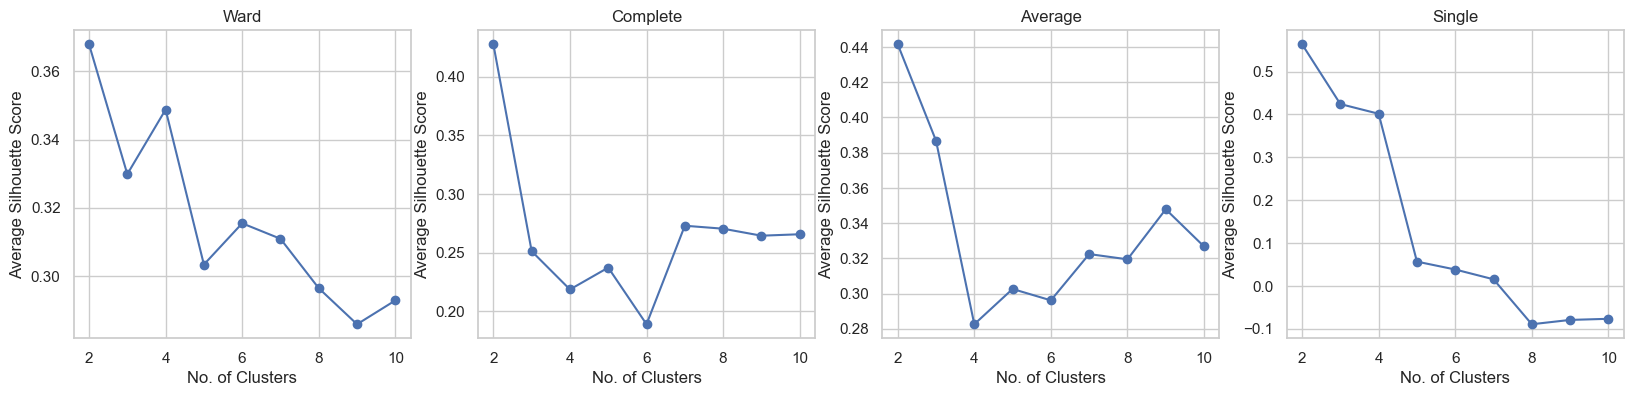

In [16]:
plt.figure(figsize=(20, 4))  

plt.subplot(141)
plt.plot(np.arange(2, 11), agg_silhouette_avgs_1, 'o-b')  
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Ward')

plt.subplot(142)
plt.plot(np.arange(2, 11), agg_silhouette_avgs_2, 'o-b')  
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Complete')

plt.subplot(143)
plt.plot(np.arange(2, 11), agg_silhouette_avgs_3, 'o-b')  
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average')

plt.subplot(144)
plt.plot(np.arange(2, 11), agg_silhouette_avgs_4, 'o-b')  
plt.xlabel('No. of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Single')

plt.show()  

Using the visual cluster plots and local maximum silhouette scores as criteria, the best agglomerative clustering model found using the combined dataset was: <b>4-clusters Agglomerative Clustering</b> with a silhouette score of <b>0.3488</b>.

Comparing the results of K-Means and Agglomerative Clustering on the combined dataset, <b>K-Means has a higher silhouette score</b> than Agglomerative Clustering. Thus, K-Means Clustering will be used for EDA of all datasets.

## EDA with Clustering Results

In [17]:
# Apply K-Means using the best n_cluster
c_kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', random_state=42).fit(X_pca)

# Augment the cluster labels in the dataframe
df['cluster'] = c_kmeans.labels_

df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  cluster  
0     1       3         6   5   6   6        1  
1     1       3         4   5   5   6        2  
2     3       3        10   7   8  10        2  
3     1       5         2  15  14  15        1  
4     2       5         4   6  10  10        1

### Check cluster cardinality

In [18]:
print(f"Combined dataset\n {df['cluster'].value_counts()}\n")

Combined dataset
 cluster
2    415
1    408
0    221
Name: count, dtype: int64



### Categorical Feature Counts vs. Cluster (Combined Dataset)

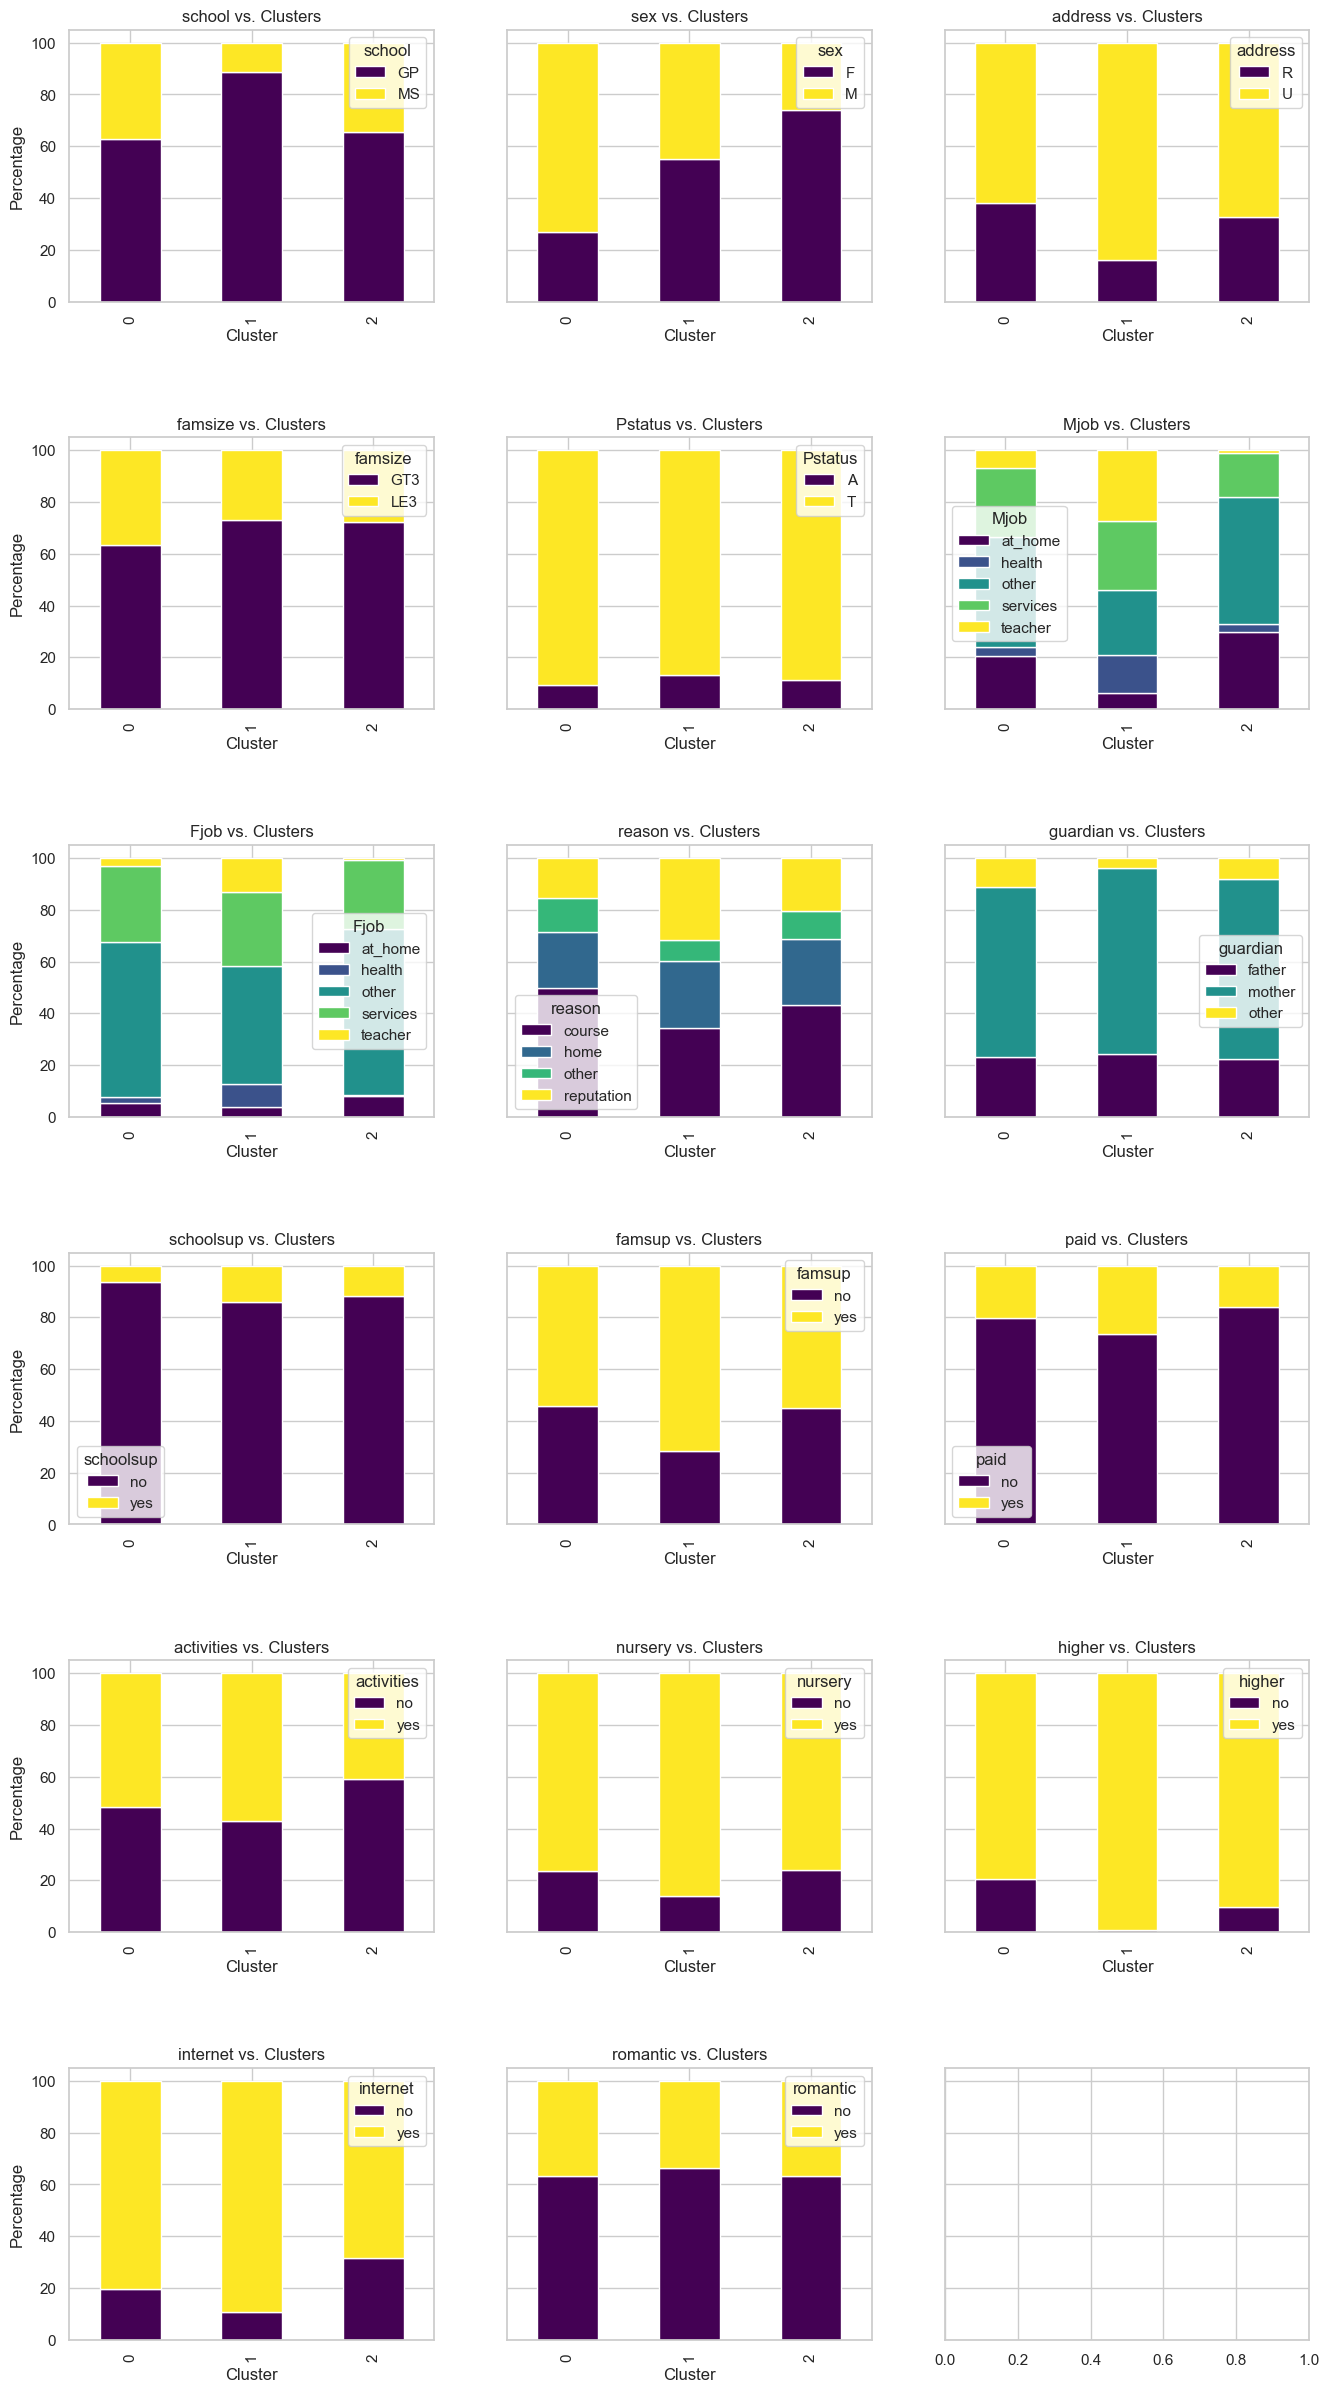

In [19]:
fig, axes = plt.subplots(6, 3, figsize=(16, 30), sharey=True)
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]

    # Normalize counts (percentage)
    df_counts = df.groupby(['cluster', feature]).size().unstack(fill_value=0)
    df_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100

    # Stacked bar chart
    df_percent.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
    ax.set_title(f"{feature} vs. Clusters")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Percentage")
    ax.legend(title=feature)

plt.subplots_adjust(hspace=0.5)
plt.show()

Notable Observations from Categorical Features

Cluster 0:
1. Most are male students
2. Lowest urban/rural ratio
3. half of cluster 0 chose their schools based on course preference
4. has the lowest educational support

Cluster 1:
1. Majority are studying in GP
2. Has balanced M/F ratio
3. Highly urbanized
4. Most of students with teaching parents are in cluster 1
5. Chose their schools based on reputation more than other clusters
6. Has highest educational and family support
7. Wants to take higher education
8. Has the most internet access at home

Cluster 2:
1. Most are female students
2. Most have parents not working at health, academe, or services sector
3. Has higher educational support than cluster 0, but lower than cluster 1
4. Less active in extracurricular activities than other clusters
5. Has the lowest fraction of students with internet access

### Numeric Feature Values vs. Clusters

In [20]:
plt.figure(figsize=(16, 25))
i = 1

for feature in numeric_features:
    plt.subplot(5, 3, i)
    sns.violinplot(data=df, x='cluster', y=feature, palette='coolwarm', hue='cluster')
    plt.title(f"{feature.title()} vs. Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature.title())

    i += 1

plt.subplots_adjust(hspace=0.3)
plt.show()

Notable Observations from Categorical Features

Cluster 0 (The Free-Spirited):
1. Median age is 17
2. Parents' median educational level is 5th-9th grade
3. Has less study time than other clusters
4. Has considerable number of class failures
5. Has highest median free time
6. Highest tendency to go out with friends
7. Highest daily and weekly alcohol consumption.
8. Highest median absences.

Cluster 1 (Academic Achievers):
1. Youngest among clusters (median = 16)
2. Has highest parents' educational level
3. Median travel time is lowest (< 15 min)
4. Higher study time than cluster 0 (free-spirited)
5. Lowest number of failures
6. Has lower free time than cluster 0
7. Has lower tendency to go out than cluster 0
8. Has lower median alcohol consumption than cluster 0
9. Lowest median absences.

Cluster 2 (Low-key Scholars):
1. Median age is 17
2. Median parents' education is similar to cluster 0 (free-spirited)
3. Similar median study time to cluster 1 (academic achievers)
4. Similar median free time and tendency to go out to cluster 1
5. Lowest alcohol consumption
6. Median health status is 3 (fair), lowest than clusters 0 and 1
7. Lower median absences than cluster 0

### Target Label (Grades) vs. Clusters

In [21]:
plt.figure(figsize=(16, 5))
i = 1

for label in ['G1', 'G2', 'G3']:
    plt.subplot(1, 3, i)
    sns.violinplot(data=df, x='cluster', y=label, palette='coolwarm', hue='cluster')
    plt.title(f"{label.title()} vs. Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(label.title())

    i += 1

plt.subplots_adjust(hspace=0.3)
plt.show()

<b>Clusters ranked according to median grades (Combined):</b>

<b><span style="color: #90EE90;">Academic Achievers (Cluster 1)</b>

Highlights:
1. Most of students with teaching parents are in cluster 1
2. Chose their schools based on reputation more than other clusters
3. Has highest educational and family support
4. Has the most internet access at home
5. Has highest parents' educational level
6. Higher study time than cluster 0 (free-spirited)
7. Has lower free time than cluster 0
8. Has lower tendency to go out than cluster 0
9. Has lower median alcohol consumption than cluster 0
10. Lowest absences

<b><span style="color: #87CEEB;">Low-key Scholars (Cluster 2)</b>

Highlights:
1. Most are female students
2. Has higher educational support than cluster 0, but lower than cluster 1
3. Less active in extracurricular activities than other clusters
4. Has the lowest fraction of students with internet access
5. Median parents' education is similar to cluster 0
6. Similar median study time to cluster 1
7. Similar median free time and tendency to go out to cluster 1
8. Lowest alcohol consumption
9. Median health status is 3 (fair), lowest than clusters 0 and 1
10. Lower median absences than cluster 0

<b><span style="color: #FF7F7F;">The Free-Spirited (Cluster 0)</b>

Highlights:
1. Most are male students
2. Half of cluster 0 chose their schools based on course preference
3. Has the lowest educational support
4. Parents' median educational level is 5th-9th grade
5. Has less study time than other clusters
6. Has considerable number of class failures
7. Has highest median free time
8. Highest tendency to go out with friends
9. Highest daily and weekly alcohol consumption.
10. Highest median absences.



We can see from above how the different feature combinations resulted in their grades (ranked). The group with the highest median grades have more academic resources to use and less time in social activities, while the group with the lowest median grades have lowest educational support, lowest parents' educational attainment, lowest study time, and highest tendency to engage in social activities.